# PSet 3: Wasil Engel 

In [1]:
# I collaborated with Gina Son. 

In [2]:
# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.utils import resample

from mlxtend.feature_selection import SequentialFeatureSelector

# to ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
# ch 5, no. 6

In [5]:
path = '/Users/wasilengel/Desktop/School/Harris/Machine Learning/Pset 3/Data-Default.csv'

In [6]:
default = pd.read_csv(path)

In [7]:
default.head() # 10000 rows × 5 columns

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [8]:
# a 

In [9]:
encoding_dict = {"Yes": 1, "No": 0}
default["default"] = default["default"].map(encoding_dict)
default.head()

,Unnamed: 0,default,student,balance,income
0,1,0,No,729.526495,44361.625074
1,2,0,Yes,817.180407,12106.134700
2,3,0,No,1073.549164,31767.138947
3,4,0,No,529.250605,35704.493935
4,5,0,No,785.655883,38463.495879


In [10]:
X = default[["balance", "income"]]
X = sm.add_constant(X)
y = default["default"]

In [11]:
results = sm.Logit(y, X).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 25 Feb 2021   Pseudo R-squ.:                  0.4594
Time:                        19:18:48   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

In [12]:
# The SE for balance are 0.000 and for income 4.99e-06. 

In [13]:
# b 

In [14]:
def get_indices(data, num_samples):
    np.random.seed(1) 
    positive_data = data[data["default"] == 1]
    negative_data = data[data["default"] == 0]
    positive_indices = np.random.choice(positive_data.index, int(num_samples / 4), replace = True)
    negative_indices = np.random.choice(negative_data.index, int(3*num_samples / 4), replace = True)
    total = np.concatenate([positive_indices, negative_indices])
    np.random.shuffle(total)
    return total

In [15]:
def boot_fn(data, index):
    np.random.seed(1)
    X = data[["balance", "income"]].loc[index]
    y = data["default"].loc[index]
    lr = LogisticRegression()
    lr.fit(X, y)
    intercept = lr.intercept_
    coef_balance = lr.coef_[0][0]
    coef_income = lr.coef_[0][1]
    return [intercept, coef_balance, coef_income]

In [16]:
intercept, coef_balance, coef_income = boot_fn(default, get_indices(default, 100))
print(f"Intercept is {intercept}, the coeff of balance is {coef_balance}, the coeff for income is {coef_income}")

Intercept is [-8.04879871], the coeff of balance is 0.005780699640378781, the coeff for income is -1.2658749130744869e-05


In [17]:
# c (purpose: compare SE -- however, unable because Python)

In [18]:
def boot(data, func, R):
    total_coeff_balance = []
    total_coeff_income = []
    for i in range(R):
        bootstrap = resample(data, replace=True, n_samples=(0.3*default.size), random_state=i, stratify = data['default'])
        params = func(data, bootstrap.index)
        total_coeff_balance.append(params[0])
        total_coeff_income.append(params[1])
    return (np.mean(total_coeff_balance), np.mean(total_coeff_income))

In [19]:
total_coeff_balance, total_coeff_income = boot(default, boot_fn, 1000)

In [20]:
print(f"The total coeff of balance is {total_coeff_balance} and the total coeff of income is {total_coeff_income}")

The total coeff of balance is -6.995066160623887 and the total coeff of income is 0.003581866219277763


In [21]:
# d

In [22]:
# Since this is a simplified version of the R boot function, I am unable
# to get the standard errors, however, I would expect them to be very 
# similiar -- unlike the coefficient estimates/ means, which are at 
# -6.995 for balance and at 0.004 for income and thus different from 
# the coefficients in part a) which vary unless I set seed in boot_fn(). 

In [23]:
# ch 5, no. 8

In [24]:
# a 

In [25]:
np.random.seed(1)
y = np.random.normal(size = 100)
X = np.random.normal(size = 100)
y = X - 2 * (X ** 2) + np.random.normal(size = 100)

In [26]:
# n is 100 -> number of observations/ units
# p is 2 -> number of independent variables/ features (X, X^2)
# equation is y = X - 2X^2 + e // where e = error term 

In [27]:
# b

Text(0.5, 1.0, 'scatter plot')

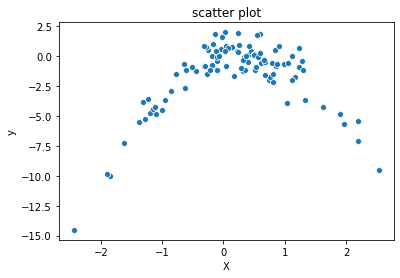

In [28]:
sns.scatterplot(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("scatter plot")

In [29]:
# Comment on what you find: simulated resembles a quadratic function that 
# ranges from -15 to 2.5 along the y-axis and -2 to 2 along the x-axis.

In [30]:
# c 

In [31]:
np.random.seed(1)

In [32]:
for i in range (1, 5):
    poly = PolynomialFeatures(i, include_bias = False)
    predictors = poly.fit_transform(X.reshape(-1, 1))
    lr = LinearRegression()
    error = -1 * cross_val_score(lr, predictors, y, cv = len(X), scoring = "neg_mean_squared_error").mean()
    print(f"For model {i}, error is {error}")

For model 1, error is 8.292211622874765
For model 2, error is 1.01709580703398
For model 3, error is 1.046553456329668
For model 4, error is 1.0574926712115125


In [33]:
# d

In [34]:
np.random.seed(50374)
for i in range (1, 5):
    poly = PolynomialFeatures(i, include_bias = False)
    predictors = poly.fit_transform(X.reshape(-1, 1))
    lr = LinearRegression()
    error = -1 * cross_val_score(lr, predictors, y, cv = len(X), scoring = "neg_mean_squared_error").mean()
    print(f"For model {i}, error is {error}")

For model 1, error is 8.292211622874765
For model 2, error is 1.01709580703398
For model 3, error is 1.046553456329668
For model 4, error is 1.0574926712115125


In [35]:
# Our results are identical because in LOOCV, there is no random sampling, 
# instead, it is being trained on the same n-1 observations/ folds (and 
# then just tested on the observations that is being left-out). 

In [36]:
# e

In [37]:
# Yes, I expected the second model to have the smallest LOOCV test error
# because of its underlying quadratic form, which we have seen in b (see 
# scatterplot). This is what best fits the second model, which is
# the one with a quadratic form too: Y = β0 + β1X + β2X2 + e. 

In [38]:
# f

In [39]:
for i in range (1, 5):
    poly = PolynomialFeatures(i)
    predictors = poly.fit_transform(X.reshape(-1, 1))
    results = sm.OLS(y, predictors).fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     9.460
Date:                Thu, 25 Feb 2021   Prob (F-statistic):            0.00272
Time:                        19:20:33   Log-Likelihood:                -242.69
No. Observations:                 100   AIC:                             489.4
Df Residuals:                      98   BIC:                             494.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7609      0.280     -6.278      0.0

In [40]:
# When I run the four model in a OLS regression, the coefficient estimates
# for x1 is statistically significant for the first/ linear model(0.003). 
# Beyond that, the x1 and x2 estimates are even more highly significant
# for the second (quadratic) model, third, and fourth models (at a level
# of 0.000). Note how neither x3 in model 3 nor x3 and x4 are significant
# at conventional significance levels. This suggests that our results
# agree with our previous findings from CV where especially the quadratic
# function yielded the smallest LOOCV test error (see answer to part e).

In [41]:
# ch 6, no. 11

In [42]:
# a

In [43]:
## Explore

In [44]:
boston = load_boston()

In [45]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [46]:
predictors = data.drop("CRIM", axis = 1)
X = data.drop("CRIM", axis = 1)
y = data["CRIM"]
predictors.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


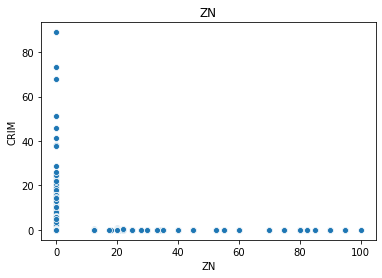

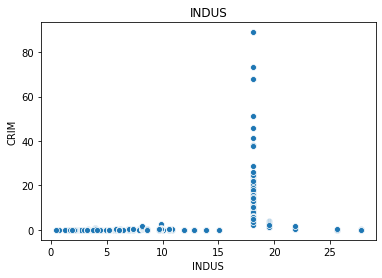

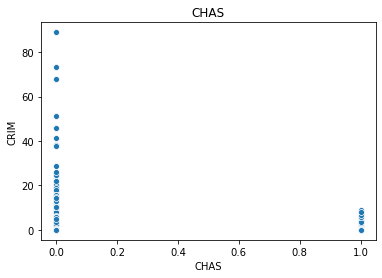

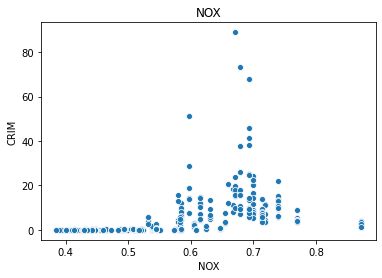

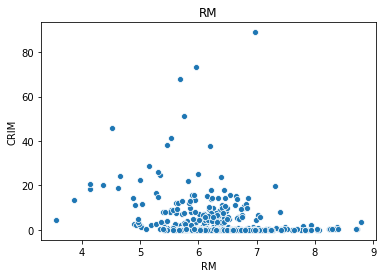

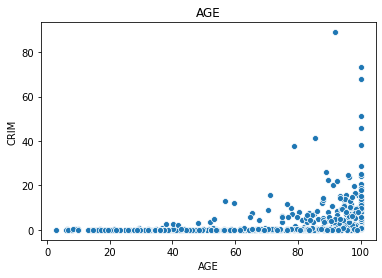

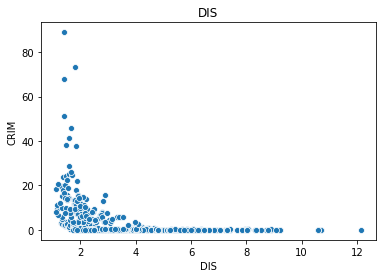

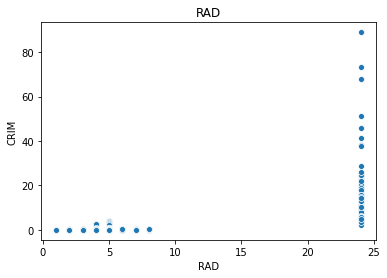

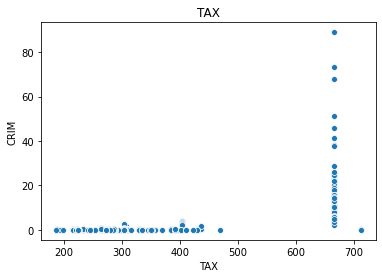

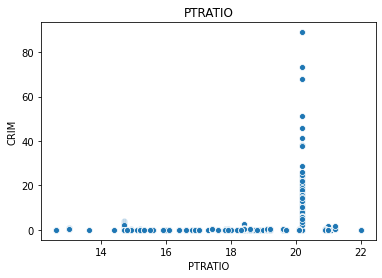

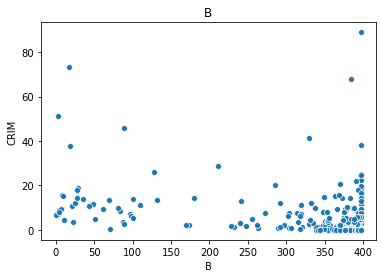

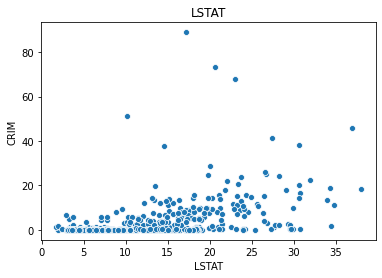

In [47]:
for feature in predictors.columns:
    sns.scatterplot(predictors[feature], data["CRIM"])
    plt.title(feature)
    plt.show()

In [48]:
## Best subset selection

# Quite frankly, this does not add up for me. Why are we hand-selecting
# features for best subset selection when our outcome should be a subset 
# of variables that best suit our model? Hmm. Instead, we calculate the 
# error rate here for a model that we choose based on visual correlation? 
# But how is that best subset selection as demonstrated in Friday's lab?

In [49]:
hand_selected_features = ["NOX", "DIS", "RAD", "LSTAT"]
# Based on explored/ visualized data correlation from scatterplots 

In [50]:
results_dict = {}

In [51]:
lin_reg = LinearRegression()
error = cross_val_score(lin_reg, predictors[hand_selected_features], y, cv=5, scoring = "neg_mean_squared_error")
print("Error for best subset selection is", -np.mean(error))
results_dict["Best_subset"] = -np.mean(error)

Error for best subset selection is 44.46861428992999


In [52]:
## Forward stepwise selection

In [53]:
## Option 1:

In [54]:
P = len(X.columns)
used_pred = []
M = []
M_scores = []

for K in range(P):
    best_score = -1000
    best_pred = None
        
    # Inner loop
    for var in X.columns:
            
        # Skips if predictor already used
        if var not in used_pred:
            predictors = used_pred[:]   
            predictors.append(var)
            
            score = np.mean(cross_val_score(lin_reg, X[predictors], y, cv = 5, scoring = 'neg_mean_squared_error'))
            if score > best_score:
                best_score = score
                best_pred = var
    
    # Updates the list of used predictors and list of Mk models
    used_pred.append(best_pred)
    M.append(used_pred[:]) 
    M_scores.append(best_score)                             
    
best_M = M_scores.index(max(M_scores))
print('Predictors that make the best model are: ', M[best_M])

Predictors that make the best model are:  ['RAD', 'LSTAT', 'ZN']


In [55]:
## Option 2:

In [56]:
sfs1 = SequentialFeatureSelector(lin_reg, 
           k_features="best", 
           forward=True, 
           scoring='neg_mean_squared_error',
           cv=5)

sfs1.fit(X, y)
sfs1.k_feature_names_

('ZN', 'RAD', 'LSTAT')

In [57]:
## Backwards stepwise selection

In [58]:
sfs1 = SequentialFeatureSelector(lin_reg, 
           k_features="best", 
           forward=False, 
           scoring='neg_mean_squared_error',
           cv=5)

sfs1.fit(X, y)
sfs1.k_feature_names_

('ZN', 'NOX', 'DIS', 'RAD', 'LSTAT')

In [59]:
# In the forwards subset selection, we start out with no Xs and add 
# those X that most fit and repeat the process until all Xs are in the 
# model. In the backwards subset selection, we start with all Xs and
# then remove X's that least fit and repeat the process until there are 
# no Xs left in the model. Doing that, 
# 1. forwards selection yields: ['RAD', 'LSTAT', 'ZN'] -- same by the 
# way for both of the options I explored, while
# 2. backward selection yields: ('ZN', 'NOX', 'DIS', 'RAD', 'LSTAT'). 
# Moving forward, I'll use only those three variables that appear to 
# contribute to best model fit resulting from both methods, namely:
# ['RAD', 'LSTAT', 'ZN']

# Going back to best subset selection, as I said before, what we 
# learned in lab on how to do it just does not add up for me (cf. 
# above): why are we hand-selecting features when our outcome itself
# should be a subset of variables that render best fit?

In [60]:
# b

In [61]:
# Evaluate model performances for each of the Xs I got in a) 
# using K-Fold-CV -> so that is for: ['RAD', 'LSTAT', 'ZN']

In [62]:
error_list = []
for power in range(1, 11):
    X = data['RAD']
    y = data["CRIM"]
    poly = PolynomialFeatures(power, include_bias = False)
    X = poly.fit_transform(X.to_frame())
    lr = LinearRegression()
    error_list.append(-1*cross_val_score(lr, X, y, cv=10, scoring="neg_mean_squared_error").mean())
print("K Fold CV")
print('RAD')
mini = min(error_list)
print(f"min MSE is: {mini}")
pd.DataFrame({"Degree": np.arange(1,11), "CV Mean Squared Error": error_list}) 

K Fold CV
RAD
min MSE is: 47.97718978748334


,Degree,CV Mean Squared Error
0,1,48.768793
1,2,48.043177
2,3,47.978395
3,4,47.991735
4,5,47.979834
5,6,47.978216
6,7,47.977190
7,8,47.980914
8,9,47.979985
9,10,47.980026


In [63]:
error_list = []
for power in range(1, 11):
    X = data['LSTAT']
    y = data["CRIM"]
    poly = PolynomialFeatures(power, include_bias = False)
    X = poly.fit_transform(X.to_frame())
    lr = LinearRegression()
    error_list.append(-1*cross_val_score(lr, X, y, cv=10, scoring="neg_mean_squared_error").mean())
print("K Fold CV")
print('LSTAT')
mini = min(error_list)
print(f"min MSE is: {mini}")
pd.DataFrame({"Degree": np.arange(1,11), "CV Mean Squared Error": error_list}) 

K Fold CV
LSTAT
min MSE is: 66.93054895442995


,Degree,CV Mean Squared Error
0,1,68.070321
1,2,66.930549
2,3,67.489220
3,4,68.582508
4,5,71.057341
5,6,74.777640
6,7,74.287742
7,8,73.539888
8,9,74.979807
9,10,78.408573


In [64]:
error_list = []
for power in range(1, 11):
    X = data['ZN']
    y = data["CRIM"]
    poly = PolynomialFeatures(power, include_bias = False)
    X = poly.fit_transform(X.to_frame())
    lr = LinearRegression()
    error_list.append(-1*cross_val_score(lr, X, y, cv=10, scoring="neg_mean_squared_error").mean())
print("K Fold CV")
print('ZN')
mini = min(error_list)
print(f"min MSE is: {mini}")
pd.DataFrame({"Degree": np.arange(1,11), "CV Mean Squared Error": error_list}) 

K Fold CV
ZN
min MSE is: 78.61980834721646


,Degree,CV Mean Squared Error
0,1,79.745749
1,2,78.863982
2,3,78.685411
3,4,78.647834
4,5,78.634643
5,6,78.627384
6,7,78.619808
7,8,78.679256
8,9,78.975062
9,10,80.318364


In [65]:
# Judging by the lowest CV MSE which I printed out on top of each table 
# for the variables I previously identified in part a), I would propose 
# a model with 2 degrees because that yields the lowest *TOTAL* CV MSE. 

# The reason is that even though ZN and RAD both suggest that 7 is the 
# model resulting in the lowest CV MSE, we need to take the sum of total
# test errors into account should we do that. Note how for ZN and RAD 
# the MSE rates are pretty much constant for all polynomial model degrees. 
# They differ by less than one percentage point for the degree values we
# care about, therefore it doesn't matter to much for them what model 
# degree we pick. This is very different for LSTAT. Here, the CV MSE 
# differs notably across the degrees which is why I prioritize choosing
# its lowest CV MSE because that returns the lowest CV MSE for the model
# overall. Since it's lowest for 2 degrees for LSTAT, I shall use a 
# quadratic model function. 

In [66]:
# c

In [67]:
# The forwards and backward subset selection methods both return a subset
# of the variables which is what the name suggests too: # ['RAD', 'LSTAT', 
# 'ZN']. As I already elaborated on in greater detail in part a): 

# "In the forwards subset selection, we start out with no Xs and add 
# those X that most fit and repeat the process until all Xs are in the 
# model. In the backwards subset selection, we start with all Xs and
# then remove X's that least fit and repeat the process until there are 
# no Xs left in the model. Doing that, 
# 1. forwards selection yields: ['RAD', 'LSTAT', 'ZN'] -- same by the 
# way for both of the options I explored, while
# 2. backward selection yields: ('ZN', 'NOX', 'DIS', 'RAD', 'LSTAT'). 
# Moving forward, I'll use only those three variables that appear to 
# contribute to best model fit resulting from both methods, namely:
# ['RAD', 'LSTAT', 'ZN']""